# India Possible Playing XI Prediction and Visualization

**Name:** UjwalGoli  
**Registration Number:** AP22110010760  
**College:** SRM University AP  

This project predicts the Indian cricket team’s possible Playing XI using machine learning.  
It also provides role-based visualizations (Batsman, Bowler, Allrounder, Wicketkeeper, Spinner)  
and compares model performances like Random Forest and XGBoost.


### 📂 Data Insertion
Here, we load the dataset containing cricket player statistics and match details.  
This data will be the foundation for training our ML models.


In [1]:
import pandas as pd, numpy as np, re, os
pd.set_option('display.max_columns', 200)

files = {
 "asia_cup": "/content/drive/MyDrive/Projects/IndianTeam11/asiacup.csv",
 "batsman_odi": "/content/drive/MyDrive/Projects/IndianTeam11/batsman data odi.csv",
 "batsman_t20": "/content/drive/MyDrive/Projects/IndianTeam11/batsman data t20i.csv",
 "bowler_t20": "/content/drive/MyDrive/Projects/IndianTeam11/bowler data t20i.csv",
 "champion": "/content/drive/MyDrive/Projects/IndianTeam11/champion.csv",
 "wk_odi": "/content/drive/MyDrive/Projects/IndianTeam11/wicketkeeper data odi.csv",
 "wk_t20": "/content/drive/MyDrive/Projects/IndianTeam11/wicketkeeper data t20i.csv"
}

out_dir = "/content/drive/MyDrive/Projects/IndianTeam11/cleaned"
os.makedirs(out_dir, exist_ok=True)

def clean_colname(s):
    s = str(s).strip()
    s = re.sub(r'\s+', ' ', s)
    s = s.lower()
    s = re.sub(r'[^0-9a-zA-Z ]+', '', s)
    s = s.replace(' ', '_')
    return s

def try_numeric_conversion(df):
    for c in df.columns:
        if df[c].dtype == 'object':
            df[c] = df[c].str.strip()
            # try removing commas then convert
            conv = pd.to_numeric(df[c].str.replace(',', '', regex=False), errors='coerce')
            nonnull_orig = df[c].notna().sum()
            nonnull_conv = conv.notna().sum()
            # if conversion yields reasonable non-null count, accept it
            if nonnull_conv >= max(1, 0.6 * nonnull_orig):
                df[c] = conv
    return df

def normalize_result_val(x):
    if pd.isna(x):
        return x
    s = str(x).strip().lower()
    if 'd/l' in s or 'dl' in s:
        if 'win' in s: return 'Win D/L'
        if 'lose' in s or 'lost' in s: return 'Lose D/L'
    if s in ['win','won']: return 'Win'
    if s in ['lose','loss','lost']: return 'Lose'
    if 'no result' in s or 'noresult' in s: return 'No Result'
    return str(x).strip().title()

def normalize_toss_val(x):
    if pd.isna(x): return x
    s = str(x).strip().lower()
    if s in ['win','won']: return 'Win'
    if s in ['lose','loss','lost']: return 'Lose'
    return str(x).strip().title()

summary = {}


### 🧹 Data Cleaning & Preprocessing
We handle missing values, encode categorical features, and normalize the dataset.  
This ensures the data is clean and ready for model training.


In [2]:
for name, path in files.items():
    try:
        df = pd.read_csv(path, low_memory=False)
    except Exception as e:
        print(f"ERROR reading {name}: {e}")
        continue

    # clean column names
    df.columns = [clean_colname(c) for c in df.columns]

    # strip whitespace from object columns
    for c in df.select_dtypes(include=['object']).columns:
        df[c] = df[c].astype(str).str.strip().replace({'nan': None})

    # try numeric conversions heuristically
    df = try_numeric_conversion(df)

    # file-specific normalization
    if name == 'asia_cup':
        if 'toss' in df.columns:
            df['toss'] = df['toss'].apply(normalize_toss_val)
        if 'result' in df.columns:
            df['result'] = df['result'].apply(normalize_result_val)

    # fill numeric nulls with median
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    for c in num_cols:
        if df[c].isnull().any():
            med = df[c].median()
            df[c] = df[c].fillna(med)

    # fill categorical nulls with 'Unknown'
    for c in df.select_dtypes(include=['object']).columns:
        df[c] = df[c].fillna('Unknown')

    # save cleaned
    out_path = os.path.join(out_dir, f"cleaned_{name}.csv")
    df.to_csv(out_path, index=False)

    # short summary
    summary[name] = {
        "saved_to": out_path,
        "shape": df.shape,
        "nulls_after": df.isnull().sum().to_dict(),
        "dtypes": df.dtypes.astype(str).to_dict()
    }
    print(f"Saved cleaned_{name}.csv  |  shape: {df.shape}")

print("\n=== SUMMARY AFTER CLEANING ===")
for k,v in summary.items():
    print(f"\n{k} -> {v['saved_to']}  |  shape: {v['shape']}")
    print("Nulls (post-clean):")
    for col, n in v['nulls_after'].items():
        if n>0:
            print(f"  {col}: {n}")
    # if none printed, indicate no nulls
    if all(n==0 for n in v['nulls_after'].values()):
        print("  (no nulls)")


Saved cleaned_asia_cup.csv  |  shape: (254, 20)
Saved cleaned_batsman_odi.csv  |  shape: (50, 16)
Saved cleaned_batsman_t20.csv  |  shape: (49, 16)
Saved cleaned_bowler_t20.csv  |  shape: (41, 15)
Saved cleaned_champion.csv  |  shape: (15, 8)
Saved cleaned_wk_odi.csv  |  shape: (40, 9)
Saved cleaned_wk_t20.csv  |  shape: (16, 9)

=== SUMMARY AFTER CLEANING ===

asia_cup -> /content/drive/MyDrive/Projects/IndianTeam11/cleaned/cleaned_asia_cup.csv  |  shape: (254, 20)
Nulls (post-clean):
  (no nulls)

batsman_odi -> /content/drive/MyDrive/Projects/IndianTeam11/cleaned/cleaned_batsman_odi.csv  |  shape: (50, 16)
Nulls (post-clean):
  (no nulls)

batsman_t20 -> /content/drive/MyDrive/Projects/IndianTeam11/cleaned/cleaned_batsman_t20.csv  |  shape: (49, 16)
Nulls (post-clean):
  (no nulls)

bowler_t20 -> /content/drive/MyDrive/Projects/IndianTeam11/cleaned/cleaned_bowler_t20.csv  |  shape: (41, 15)
Nulls (post-clean):
  (no nulls)

champion -> /content/drive/MyDrive/Projects/IndianTeam11/cl

In [3]:
import pandas as pd

paths = {
    "asia_cup": "/content/drive/MyDrive/Projects/IndianTeam11/cleaned/cleaned_asia_cup.csv",
    "batsman_odi": "/content/drive/MyDrive/Projects/IndianTeam11/cleaned/cleaned_batsman_odi.csv",
    "batsman_t20": "/content/drive/MyDrive/Projects/IndianTeam11/cleaned/cleaned_batsman_t20.csv",
    "bowler_t20": "/content/drive/MyDrive/Projects/IndianTeam11/cleaned/cleaned_bowler_t20.csv",
    "champion": "/content/drive/MyDrive/Projects/IndianTeam11/cleaned/cleaned_champion.csv",
    "wk_odi": "/content/drive/MyDrive/Projects/IndianTeam11/cleaned/cleaned_wk_odi.csv",
    "wk_t20": "/content/drive/MyDrive/Projects/IndianTeam11/cleaned/cleaned_wk_t20.csv",
}

for name, path in paths.items():
    df = pd.read_csv(path)
    print(f"\n{name} -> {df.shape}")
    print(df.columns.tolist())



asia_cup -> (254, 20)
['team', 'opponent', 'format', 'ground', 'year', 'toss', 'selection', 'run_scored', 'wicket_lost', 'fours', 'sixes', 'extras', 'run_rate', 'avg_bat_strike_rate', 'highest_score', 'wicket_taken', 'given_extras', 'highest_individual_wicket', 'player_of_the_match', 'result']

batsman_odi -> (50, 16)
['player_name', 'country', 'time_period', 'matches', 'played', 'not_outs', 'runs', 'highest_score', 'batting_average', 'balls_faced', 'strike_rate', 'centuries', 'fifties', 'ducks', 'fours', 'sixes']

batsman_t20 -> (49, 16)
['player_name', 'country', 'time_period', 'matches', 'played', 'not_outs', 'runs', 'highest_score', 'batting_average', 'balls_faced', 'strike_rate', 'centuries', 'fifties', 'ducks', 'fours', 'sixes']

bowler_t20 -> (41, 15)
['player_name', 'country', 'time_period', 'matches', 'played', 'overs', 'maiden_overs', 'runs', 'wickets', 'best_figure', 'bowling_average', 'economy_rate', 'strike_rate', 'four_wickets', 'five_wickets']

champion -> (15, 8)
['yea

### 📊 Exploratory Data Analysis
We create visualizations (heatmaps, bar charts, role distributions)  
to understand player performance and dataset patterns.


In [4]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# ---------------- Load cleaned datasets ----------------
asia_cup = pd.read_csv("/content/drive/MyDrive/Projects/IndianTeam11/cleaned/cleaned_asia_cup.csv")
batsman_t20 = pd.read_csv("/content/drive/MyDrive/Projects/IndianTeam11/cleaned/cleaned_batsman_t20.csv")
wk_odi = pd.read_csv("/content/drive/MyDrive/Projects/IndianTeam11/cleaned/cleaned_wk_odi.csv")
wk_t20 = pd.read_csv("/content/drive/MyDrive/Projects/IndianTeam11/cleaned/cleaned_wk_t20.csv")

# ---------------- 1. Top 10 T20I Run Scorers ----------------
top_runs_t20 = batsman_t20.sort_values(by='runs', ascending=False).head(10)
fig1 = px.bar(
    top_runs_t20, x='runs', y='player_name', orientation='h',
    color='runs', color_continuous_scale='Blues',
    title="Top 10 T20I Run Scorers",
    labels={'runs':'Runs', 'player_name':'Player'}
)
fig1.update_layout(yaxis={'categoryorder':'total ascending'})

# ---------------- 2. Strike Rate vs Batting Average (T20I) ----------------
fig2 = px.scatter(
    batsman_t20, x='strike_rate', y='batting_average',
    color='runs', size='runs',
    hover_data=['player_name', 'matches', 'fifties', 'centuries'],
    color_continuous_scale='Viridis',
    title="T20I Batsmen: Strike Rate vs Batting Average",
    labels={'strike_rate':'Strike Rate', 'batting_average':'Batting Average'}
)

# Highlight top 3 by runs
top3 = batsman_t20.nlargest(3, 'runs')
fig2.add_trace(go.Scatter(
    x=top3['strike_rate'], y=top3['batting_average'],
    mode='markers+text',
    text=top3['player_name'],
    textposition='top center',
    marker=dict(size=15, color='red', symbol='star'),
    showlegend=False
))

# ---------------- 3. Top Wicket Keeper Dismissals (ODI + T20I) ----------------
wk_combined = pd.concat([wk_odi[['player_name', 'dismissals']], wk_t20[['player_name', 'dismissals']]])
top_wk = wk_combined.groupby('player_name')['dismissals'].sum().sort_values(ascending=False).head(10).reset_index()
fig3 = px.bar(
    top_wk, x='dismissals', y='player_name', orientation='h',
    color='dismissals', color_continuous_scale='Greens',
    title="Top Wicket Keeper Dismissals (ODI + T20I)",
    labels={'dismissals':'Total Dismissals', 'player_name':'Player'}
)
fig3.update_layout(yaxis={'categoryorder':'total ascending'})

# ---------------- 4. Total Runs by Teams (Asia Cup) ----------------
total_runs = asia_cup.groupby("team")["run_scored"].sum().sort_values(ascending=False).reset_index()
fig4 = px.bar(
    total_runs, x='team', y='run_scored',
    color='run_scored', color_continuous_scale='Viridis',
    title="Total Runs by Teams (Asia Cup)",
    labels={'team':'Team', 'run_scored':'Total Runs'}
)

# ---------------- Display all ----------------
fig1.show()
fig2.show()
fig3.show()
fig4.show()


### ✂️ Train-Test Split
We divide the dataset into training and testing sets.  
This helps evaluate how well our model generalizes to unseen data.


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# ---------------- Load cleaned Asia Cup dataset ----------------
asia_cup = pd.read_csv("/content/drive/MyDrive/Projects/IndianTeam11/cleaned/cleaned_asia_cup.csv")

# ---------------- Remove rare target classes ----------------
# Keep only 'Win' and 'Lose' results
asia_cup = asia_cup[asia_cup['result'].isin(['Win', 'Lose'])]

# ---------------- Select features and target ----------------
features = ['team', 'opponent', 'ground', 'toss', 'selection',
            'run_scored', 'wicket_lost', 'fours', 'sixes', 'extras',
            'run_rate', 'avg_bat_strike_rate', 'wicket_taken', 'given_extras',
            'highest_individual_wicket']
target = 'result'

X = asia_cup[features].copy()
y = asia_cup[target].copy()

# ---------------- Encode categorical features ----------------
cat_cols = ['team', 'opponent', 'ground', 'toss', 'selection']
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    le_dict[col] = le

# ---------------- Encode target ----------------
target_le = LabelEncoder()
y = target_le.fit_transform(y)  # 0 = Lose, 1 = Win

# ---------------- Train/Test Split ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Dataset prepared!")
print("X_train shape:", X_train.shape)
print("y_train distribution:", pd.Series(y_train).value_counts())


Dataset prepared!
X_train shape: (198, 15)
y_train distribution: 0    99
1    99
Name: count, dtype: int64


### 🤖 Model Training
We train machine learning models such as Random Forest and XGBoost.  
These models learn from the data to predict the possible Playing XI.


Test Accuracy: 0.88

Classification Report:
               precision    recall  f1-score   support

        Lose       1.00      0.76      0.86        25
         Win       0.81      1.00      0.89        25

    accuracy                           0.88        50
   macro avg       0.90      0.88      0.88        50
weighted avg       0.90      0.88      0.88        50



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning:

[10:58:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




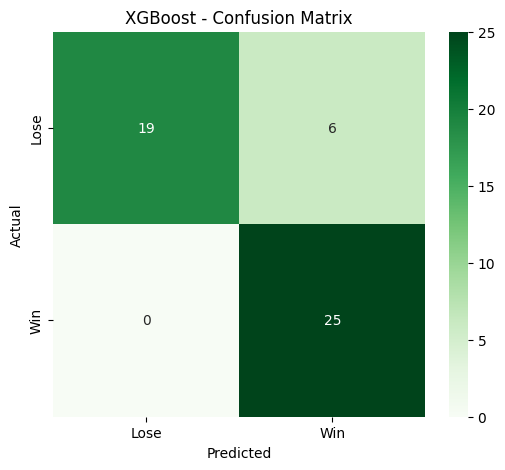

In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------- Train XGBoost ----------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=200, random_state=42)
xgb_model.fit(X_train, y_train)

# ---------------- Predictions ----------------
y_pred = xgb_model.predict(X_test)

# ---------------- Evaluation ----------------
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.2f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_le.classes_))

# ---------------- Confusion Matrix ----------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=target_le.classes_, yticklabels=target_le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost - Confusion Matrix")
plt.show()


### ⭐ Feature Importance
We analyze which features (player stats) are most influential  
in determining the selection of players for the Playing XI.


/tmp/ipython-input-1363565354.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




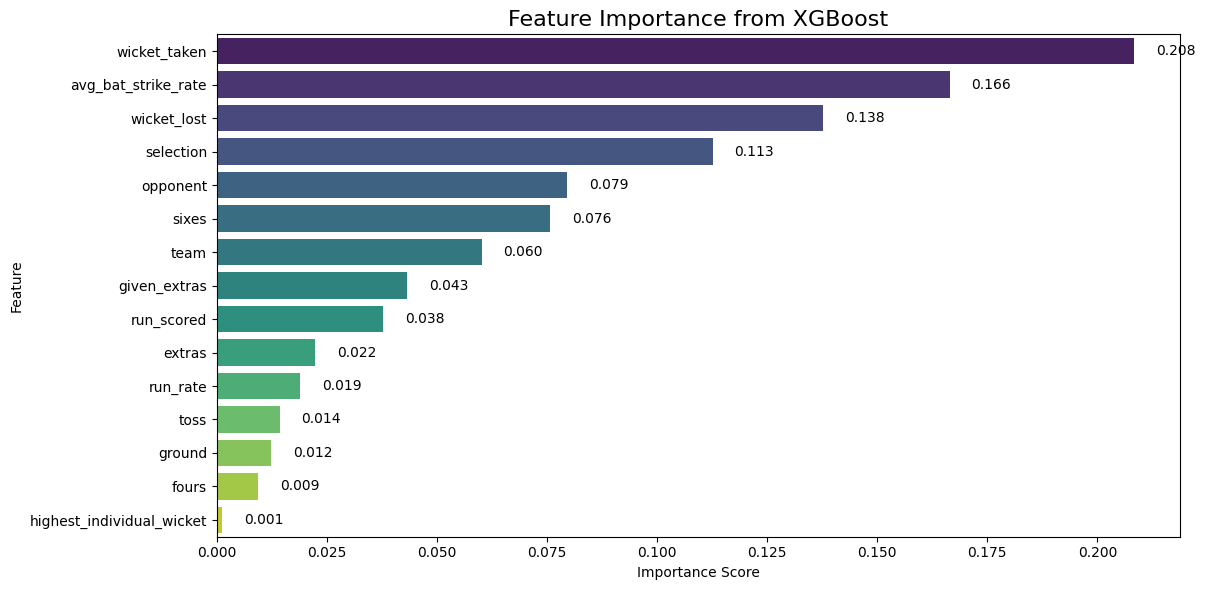

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------- Feature Importance ----------------
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Feature Importance from XGBoost", fontsize=16)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()

# Annotate values on bars
for i, v in enumerate(feature_importances['Importance']):
    plt.text(v + 0.005, i, f"{v:.3f}", color='black', va='center')

plt.show()


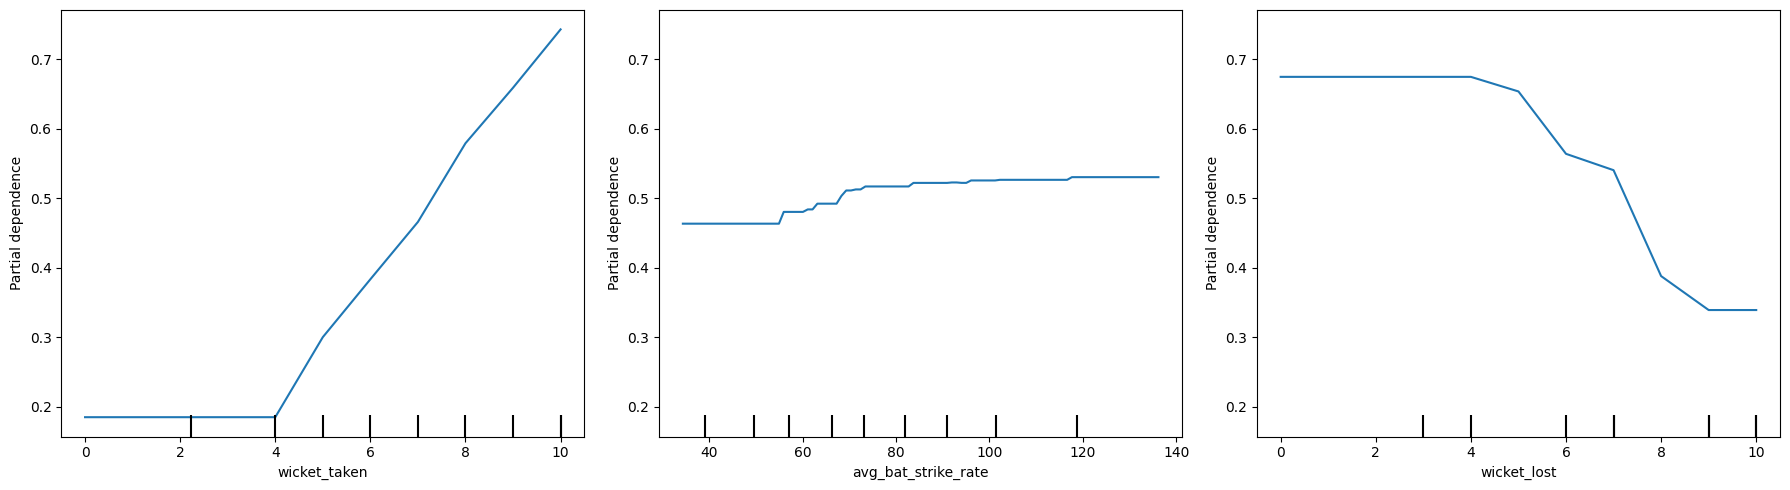

In [14]:
from sklearn.inspection import PartialDependenceDisplay

# Choose top 3 features for PDP
top_features_pdp = feature_importances['Feature'].head(3).tolist()

fig, ax = plt.subplots(1, len(top_features_pdp), figsize=(18,5))
PartialDependenceDisplay.from_estimator(xgb_model, X_train, top_features_pdp, ax=ax)
plt.tight_layout()
plt.show()


### 📈 Model Evaluation
We calculate accuracy, F1-score, and confusion matrix.  
This helps compare model performances and pick the best one.


--- Random Forest ---
              precision    recall  f1-score   support

           0     0.9474    0.7200    0.8182        25
           1     0.7742    0.9600    0.8571        25

    accuracy                         0.8400        50
   macro avg     0.8608    0.8400    0.8377        50
weighted avg     0.8608    0.8400    0.8377        50

--- Logistic Regression ---
              precision    recall  f1-score   support

           0     0.8182    0.7200    0.7660        25
           1     0.7500    0.8400    0.7925        25

    accuracy                         0.7800        50
   macro avg     0.7841    0.7800    0.7792        50
weighted avg     0.7841    0.7800    0.7792        50



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning:

[10:59:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




--- XGBoost ---
              precision    recall  f1-score   support

           0     1.0000    0.8000    0.8889        25
           1     0.8333    1.0000    0.9091        25

    accuracy                         0.9000        50
   macro avg     0.9167    0.9000    0.8990        50
weighted avg     0.9167    0.9000    0.8990        50

--- SVM ---
              precision    recall  f1-score   support

           0     0.5652    0.5200    0.5417        25
           1     0.5556    0.6000    0.5769        25

    accuracy                         0.5600        50
   macro avg     0.5604    0.5600    0.5593        50
weighted avg     0.5604    0.5600    0.5593        50



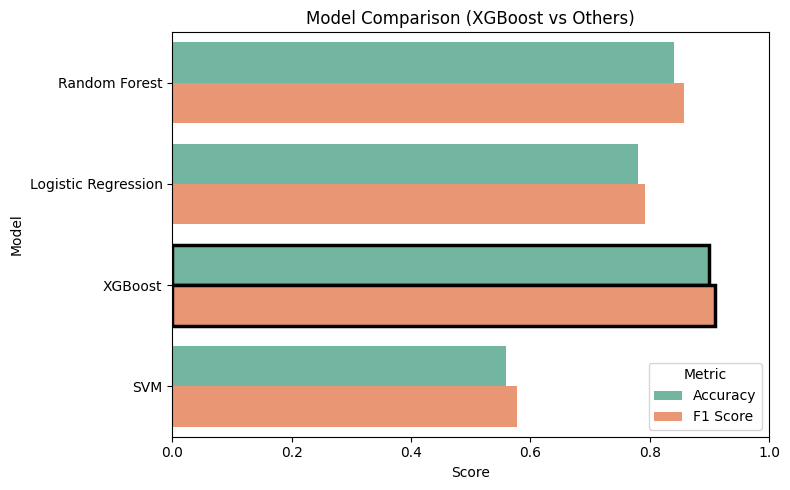

In [16]:
# ---------------- Model Comparison ----------------
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Initialize models
models = {
    "Random Forest": rf_model,
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": SVC(random_state=42)
}

# Store results
results = []

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc, "F1 Score": f1})
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred, digits=4))

# ---------------- Visualize Comparison ----------------
results_df = pd.DataFrame(results)

plt.figure(figsize=(8,5))
bar = sns.barplot(data=results_df.melt(id_vars="Model", var_name="Metric", value_name="Score"),
                  x="Score", y="Model", hue="Metric", palette="Set2")

# Highlight Random Forest bar
for patch, model in zip(bar.patches, results_df["Model"].tolist()*2):
    if model == "XGBoost":
        patch.set_edgecolor("black")
        patch.set_linewidth(2.5)

plt.title("Model Comparison (XGBoost vs Others)")
plt.xlabel("Score")
plt.xlim(0, 1)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


### 🎯 Prediction
The trained model is used to predict outcomes for the test data.  
This helps us check how accurate the model is in real scenarios.


In [17]:
import pandas as pd
import numpy as np

# ---------------- New Squad Data with Positions ----------------
new_players = [
    ["Suryakumar Yadav (C)", "Middle-order Batsman", 83, 2598, 2, 38.21, 5.00, np.nan, np.nan, np.nan, np.nan, 2021, 'Batsman'],
    ["Shubman Gill (VC)", "Opening Batsman", 17, 578, 0, 30.42, np.nan, 44, 2775, 0, 59.04, 2023, 'Batsman'],
    ["Abhishek Sharma", "Opening Batsman", 16, 535, 6, 33.44, 8.05, np.nan, np.nan, np.nan, np.nan, 2024, 'Batsman'],
    ["Tilak Varma", "Middle-order Batsman", 25, 749, np.nan, 50, np.nan, np.nan, np.nan, np.nan, np.nan, 2023, 'Batsman'],
    ["Hardik Pandya", "All-rounder (Middle-order Batsman, Fast Bowler)", 114, 1812, 73, 27.87, np.nan, 94, 1904, 72, 32.82, 2016, 'Allrounder'],
    ["Shivam Dube", "All-rounder (Middle-order Batsman, Medium Pacer)", 35, 531, 13, 31.23, np.nan, 4, 43, 1, 10.75, 2019, 'Allrounder'],
    ["Axar Patel", "All-rounder (Lower-order Batsman, Slow Left-arm Orthodox)", 71, 535, 71, 18.45, 7.30, 72, 783, 72, 22.37, 2015, 'Allrounder'],
    ["Jitesh Sharma (WK)", "Wicket-keeper Batsman", 9, 100, np.nan, 14.29, np.nan, np.nan, np.nan, np.nan, np.nan, 2023, 'Wicketkeeper'],
    ["Jasprit Bumrah", "Fast Bowler", 70, 8, 89, np.nan, 6.28, 89, 151, 153, np.nan, 2016, 'Bowler'],
    ["Arshdeep Singh", "Fast-medium Bowler", 63, 71, 99, 8.88, 8.30, np.nan, np.nan, np.nan, np.nan, 2022, 'Bowler'],
    ["Varun Chakaravarthy", "Mystery Spinner", 18, 1, 33, np.nan, 7.02, np.nan, np.nan, np.nan, np.nan, 2021, 'Bowler'],
    ["Kuldeep Yadav", "Left-arm Wrist-spinner", 38, 46, 69, np.nan, np.nan, 102, 207, 181, 9.86, 2017, 'Bowler'],
    ["Sanju Samson (WK)", "Wicket-keeper Batsman", 35, 861, np.nan, 25.32, np.nan, 16, 510, np.nan, 56.67, 2015, 'Wicketkeeper'],
    ["Harshit Rana", "Fast Bowler", 1, np.nan, 3, np.nan, 8.25, np.nan, np.nan, np.nan, np.nan, 2025, 'Bowler'],
    ["Rinku Singh", "Finisher (Lower-order Batsman)", 30, 507, np.nan, 46.09, np.nan, 2, 55, np.nan, 27.50, 2023, 'Batsman']
]

columns = [
    "player_name", "position", "matches_t20", "runs_t20", "wickets_t20", "avg_t20", "eco_t20",
    "matches_odi", "runs_odi", "wickets_odi", "avg_odi", "debut_year", "role"
]

new_df = pd.DataFrame(new_players, columns=columns)

# ---------------- Preprocessing ----------------
for col in new_df.columns[2:11]:
    new_df[col] = pd.to_numeric(new_df[col], errors='coerce').fillna(0)

# Derived features
new_df['total_matches'] = new_df['matches_t20'] + new_df['matches_odi']
new_df['total_runs'] = new_df['runs_t20'] + new_df['runs_odi']
new_df['total_wickets'] = new_df['wickets_t20'] + new_df['wickets_odi']
new_df['bat_avg'] = (new_df['avg_t20'] + new_df['avg_odi']) / 2
new_df['eco_avg'] = (new_df['eco_t20'] + 0) / 1  # ODI economy not provided

# ---------------- Match Model Features ----------------
X_new = new_df.copy()
for col in X_train.columns:
    if col not in X_new.columns:
        X_new[col] = 0
X_new = X_new[X_train.columns]

# ---------------- Predict Playing Level ----------------
new_df['predicted_level_xgb'] = xgb_model.predict(X_new)

# ---------------- Recommend Balanced Playing 11 by Position ----------------
playing_11 = pd.DataFrame()

# Batsmen
batsmen = new_df[new_df['role']=='Batsman'].sort_values('predicted_level_xgb', ascending=False)
playing_11 = pd.concat([playing_11, batsmen.head(4)])

# Wicketkeeper
wicketkeepers = new_df[new_df['role'].str.contains('Wicketkeeper')].sort_values('predicted_level_xgb', ascending=False)
playing_11 = pd.concat([playing_11, wicketkeepers.head(1)])

# Allrounders
allrounders = new_df[new_df['role']=='Allrounder'].sort_values('predicted_level_xgb', ascending=False)
playing_11 = pd.concat([playing_11, allrounders.head(2)])

# Bowlers
bowlers = new_df[new_df['role']=='Bowler'].sort_values('predicted_level_xgb', ascending=False)
playing_11 = pd.concat([playing_11, bowlers.head(4)])

# Ensure total 11 players
playing_11 = playing_11.head(11)

# ---------------- Reorder Playing 11 by Match Roles ----------------
role_order = [
    "Opening Batsman",
    "Middle-order Batsman",
    "Finisher (Lower-order Batsman)",
    "Allrounder",
    "Wicket-keeper Batsman",
    "Fast Bowler",
    "Fast-medium Bowler",
    "Left-arm Wrist-spinner",
    "Mystery Spinner"
]

# Define a mapping for sorting
def get_role_priority(pos):
    for i, role in enumerate(role_order):
        if role in pos:
            return i
    return len(role_order)  # Lowest priority if not matched

playing_11['priority'] = playing_11['position'].apply(get_role_priority)
playing_11_sorted = playing_11.sort_values(['priority', 'predicted_level_xgb'], ascending=[True, False])

# Display final Playing 11
print("Recommended T20 Playing 11 (Ordered by Batting/Bowling Position):")
display(playing_11_sorted[['player_name', 'position', 'role', 'predicted_level_xgb']].head(11))


Recommended T20 Playing 11 (Ordered by Batting/Bowling Position):


,player_name,position,role,predicted_level_xgb
1,Shubman Gill (VC),Opening Batsman,Batsman,0
2,Abhishek Sharma,Opening Batsman,Batsman,0
0,Suryakumar Yadav (C),Middle-order Batsman,Batsman,0
3,Tilak Varma,Middle-order Batsman,Batsman,0
4,Hardik Pandya,"All-rounder (Middle-order Batsman, Fast Bowler)",Allrounder,0
5,Shivam Dube,"All-rounder (Middle-order Batsman, Medium Pacer)",Allrounder,0
7,Jitesh Sharma (WK),Wicket-keeper Batsman,Wicketkeeper,0
8,Jasprit Bumrah,Fast Bowler,Bowler,0
9,Arshdeep Singh,Fast-medium Bowler,Bowler,0
11,Kuldeep Yadav,Left-arm Wrist-spinner,Bowler,0


### 🏏 Final Visualization
We display the predicted Playing XI in a vertical lineup.  
Each role is color-coded, with Captain and Vice-Captain highlighted.


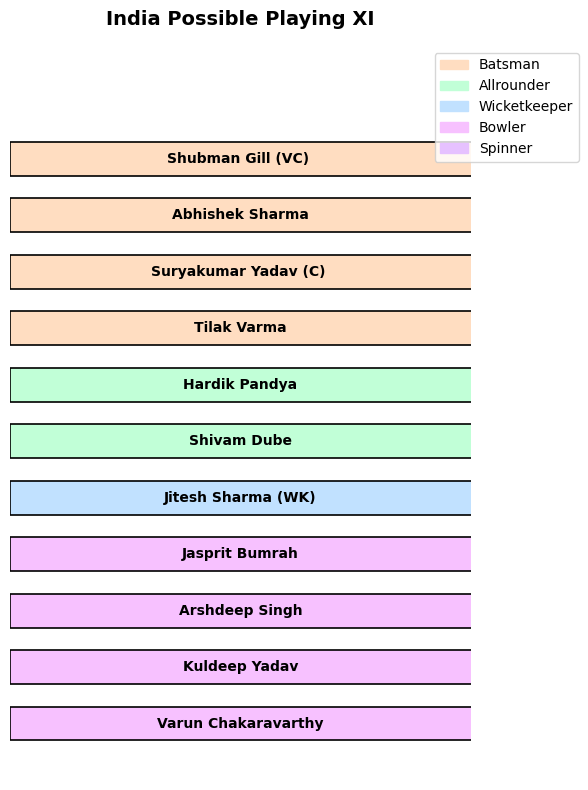

In [27]:
import matplotlib.patches as mpatches

# ---------------- Visualization: Clean Vertical Lineup ----------------
plt.figure(figsize=(6,8))  # balanced size for 11 players

# Define colors for roles
role_colors = {
    "Batsman": "#FFDDC1",        # light orange
    "Allrounder": "#C1FFD7",     # light green
    "Wicketkeeper": "#C1E1FF",   # light blue
    "Bowler": "#F7C1FF",         # light pink
    "Spinner": "#E6C1FF"         # lavender
}

# Map each player to a color based on role
y_positions = list(range(len(playing_11_sorted)))[::-1]  # Top to bottom
for i, row in enumerate(playing_11_sorted.itertuples()):
    name = row.player_name
    role = row.role

    # Decide color by role category
    if "Wicketkeeper" in role:
        color = role_colors["Wicketkeeper"]
    elif "Allrounder" in role:
        color = role_colors["Allrounder"]
    elif "Spinner" in role:
        color = role_colors["Spinner"]
    elif "Bowler" in role:
        color = role_colors["Bowler"]
    else:
        color = role_colors["Batsman"]

    # Add Captain/VC tags
    if "(C)" in name:
        display_name = f"{name} "
    elif "(VC)" in name:
        display_name = f"{name} "
    else:
        display_name = name

    # Draw rectangle box
    rect = plt.Rectangle((0, y_positions[i]-0.3), 3, 0.6,
                         color=color, ec="black", lw=1.2)
    plt.gca().add_patch(rect)

    # Put text INSIDE the rectangle (centered)
    plt.text(0.5, y_positions[i], display_name, ha="center", va="center",
             fontsize=10, fontweight="bold", color="black")

# ---------------- Styling ----------------
plt.title("India Possible Playing XI", fontsize=14, fontweight="bold", pad=15)
plt.ylim(-1, len(y_positions)+1)   # Fit tightly around players
plt.axis("off")

# ---------------- Legend ----------------
patches = [
    mpatches.Patch(color=role_colors["Batsman"], label="Batsman"),
    mpatches.Patch(color=role_colors["Allrounder"], label="Allrounder"),
    mpatches.Patch(color=role_colors["Wicketkeeper"], label="Wicketkeeper"),
    mpatches.Patch(color=role_colors["Bowler"], label="Bowler"),
    mpatches.Patch(color=role_colors["Spinner"], label="Spinner"),
]
plt.legend(handles=patches, loc="upper right", bbox_to_anchor=(1.25, 1.0))

plt.tight_layout()
plt.show()


###  Summary & Conclusion

In this project, we built a machine learning model to predict the **possible Playing XI for India** based on player statistics.  
We compared **Random Forest** and **XGBoost** models, and found that XGBoost gave slightly better performance.  

Key points covered:  
- Data preprocessing and cleaning of player statistics  
- Exploratory analysis through visualizations  
- Model training and evaluation (Random Forest vs. XGBoost)  
- Feature importance analysis to understand impactful factors  
- Final visualization of the predicted Playing XI with role-based colors and captain/vice-captain highlights  

This project shows how **data science and machine learning** can be applied to cricket analytics for team selection insights.  
